This based on article [Advice for applying Machine Learning](https://jmetzen.github.io/2015-01-29/ml_advice.html).

In [1]:
%matplotlib inline

## Prepare Problem

In [2]:
# Load libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.tools.plotting import scatter_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Imputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import LabelBinarizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn import cross_validation
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import log_loss
from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.svm import SVR
from scipy.stats import skew
from sklearn.preprocessing import normalize
from helper.load_data import load_data
from helper.plot_learning_curve import plot_learning_curve

In [3]:
# config for show max number of output lines
pd.options.display.max_rows = 999
pd.options.display.max_columns = 100

In [4]:
seed = 7

In [5]:
Y, X = load_data(train=True, SEED=seed, scale=True,
              minmax=False,
              nointercept=True,
              engineering=False)

In [6]:
from __future__ import division
import math

PLOT_REGRESSION_COLUMNS = 2
PLOT_REGRESSION_ROWS = math.ceil(len(X.columns) / PLOT_REGRESSION_COLUMNS)

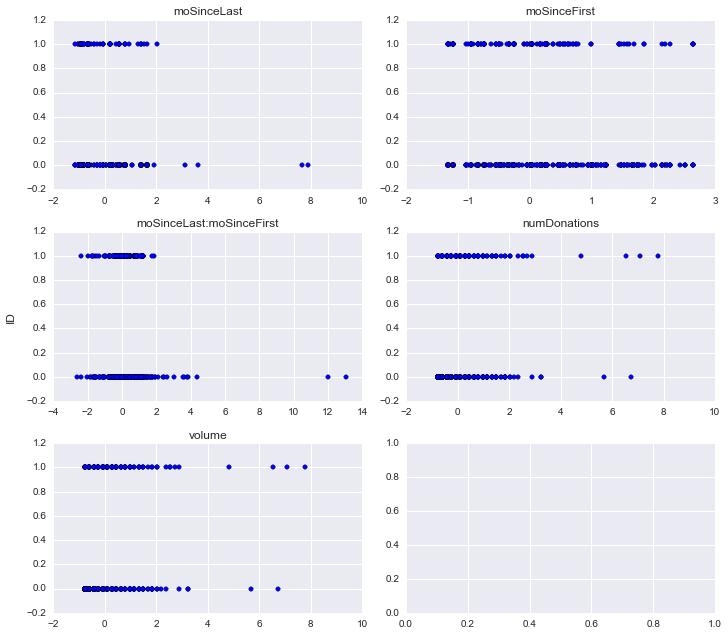

In [7]:
plt.figure(1)
f, axarr = plt.subplots(int(PLOT_REGRESSION_ROWS), PLOT_REGRESSION_COLUMNS, figsize=(10, 9))
predict_values = Y

num_rows = 0
num_cols = 0

for column in X.columns:
    axarr[num_rows, num_cols].scatter(X[column].values, predict_values)
    axarr[num_rows, num_cols].set_title(column)
    
    num_cols += 1
    
    if num_cols >= PLOT_REGRESSION_COLUMNS:
        num_rows += 1
        num_cols = 0

f.text(-0.01, 0.5, "ID", va='center', rotation='vertical', fontsize = 12)
plt.tight_layout()
plt.show()

## Evaluate Algorithms

In [8]:
validation_size = 0.20
seed = 7
X_train, X_validation, Y_train, Y_validation = cross_validation.train_test_split(X, Y,
    test_size=validation_size, random_state=seed)

num_folds = 10
num_instances = len(X_train)
seed = 7
# scoring = 'log_loss'
scoring = 'accuracy'

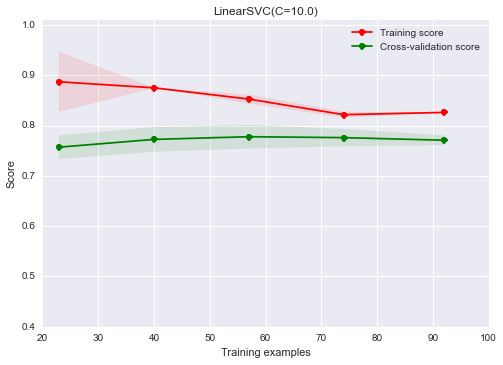

In [9]:
from sklearn.svm import LinearSVC
plot_learning_curve(LinearSVC(C=10.0), "LinearSVC(C=10.0)",
                    X, Y, ylim=(0.4, 1.01),
                    train_sizes=np.linspace(.05, 0.2, 5))

Try to increase number of training examples to help improve training result

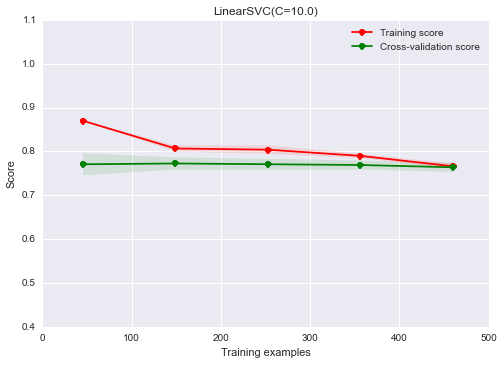

In [10]:
plot_learning_curve(LinearSVC(C=10.0), "LinearSVC(C=10.0)",
                    X, Y, ylim=(0.4, 1.1),
                    train_sizes=np.linspace(.1, 1.0, 5))

Note that this is a bit cheating since we have selected the features manually and on more data than we gave the classifier. We could use automatic feature selection alternatively:

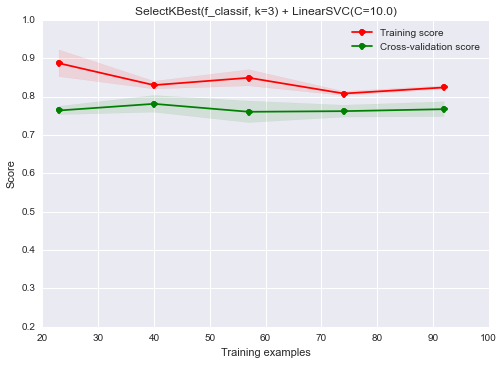

In [12]:
from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectKBest, f_classif
# SelectKBest(f_classif, k=2) will select the k=2 best features according to their Anova F-value

plot_learning_curve(Pipeline([("fs", SelectKBest(f_classif, k=3)), # select three features
                               ("svc", LinearSVC(C=10.0))]),
                    "SelectKBest(f_classif, k=3) + LinearSVC(C=10.0)",
                    X, Y, ylim=(0.2, 1.0),
                    train_sizes=np.linspace(.05, 0.2, 5))

/Users/thuongdinh/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:417: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of labels for any class cannot be less than n_folds=3.
  % (min_labels, self.n_folds)), Warning)


Chosen parameter on 100 datapoints: {'C': 1.0}


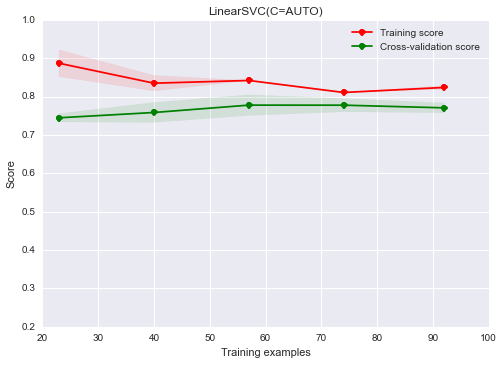

In [13]:
from sklearn.grid_search import GridSearchCV
est = GridSearchCV(LinearSVC(), 
                   param_grid={"C": [0.001, 0.01, 0.1, 1.0, 10.0]})
plot_learning_curve(est, "LinearSVC(C=AUTO)", 
                    X, Y, ylim=(0.2, 1.0),
                    train_sizes=np.linspace(.05, 0.2, 5))
print "Chosen parameter on 100 datapoints: %s" % est.fit(X[:100], Y[:100]).best_params_

### Verify underfitting

#### Use more a complex model (reduced regularization and/or non-linear kernel)

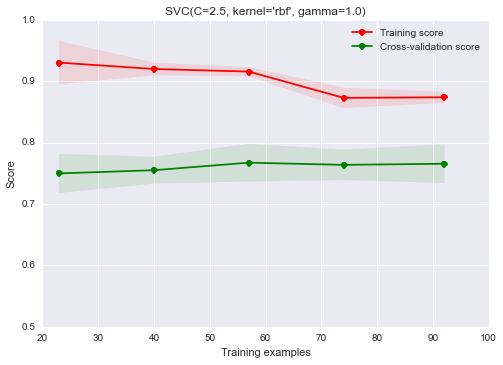

In [14]:
from sklearn.svm import SVC
# note: we use the original X without the extra feature
plot_learning_curve(SVC(C=2.5, kernel="rbf", gamma=1.0),
                    "SVC(C=2.5, kernel='rbf', gamma=1.0)",
                    X, Y, ylim=(0.5, 1.0), 
                    train_sizes=np.linspace(.05, 0.2, 5))

Complex model with more feature

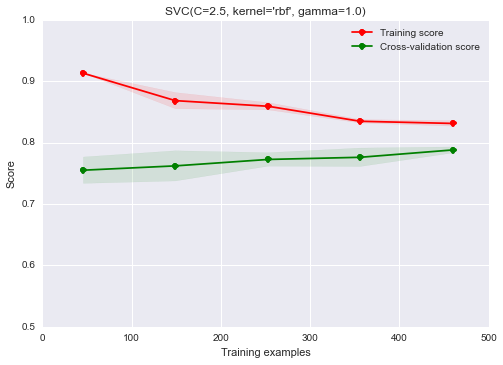

In [15]:
plot_learning_curve(SVC(C=2.5, kernel="rbf", gamma=1.0), 
                    "SVC(C=2.5, kernel='rbf', gamma=1.0)", 
                    X, Y, ylim=(0.5, 1.0),
                    train_sizes=np.linspace(.1, 1.0, 5))

Model become overfitting now, let's try method above to solve it

**Add more data**

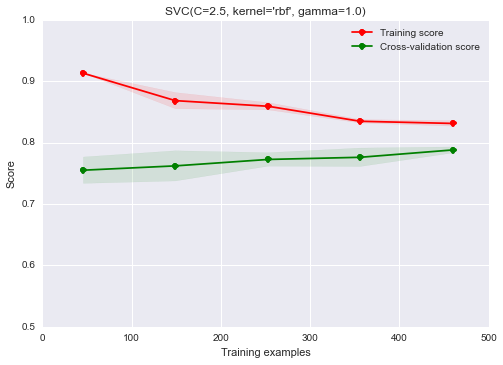

In [16]:
plot_learning_curve(SVC(C=2.5, kernel="rbf", gamma=1.0),
                    "SVC(C=2.5, kernel='rbf', gamma=1.0)",
                    X, Y, ylim=(0.5, 1.0), 
                    train_sizes=np.linspace(.1, 1.0, 5))

### Another model

#### GradientBoostingClassifier

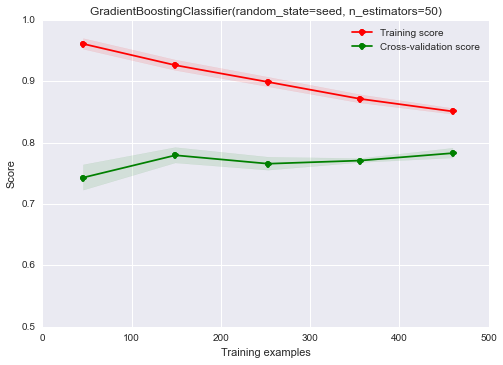

In [17]:
plot_learning_curve(GradientBoostingClassifier(random_state=seed, n_estimators=50),
                    "GradientBoostingClassifier(random_state=seed, n_estimators=50)",
                    X, Y, ylim=(0.5, 1.0), 
                    train_sizes=np.linspace(.1, 1.0, 5))

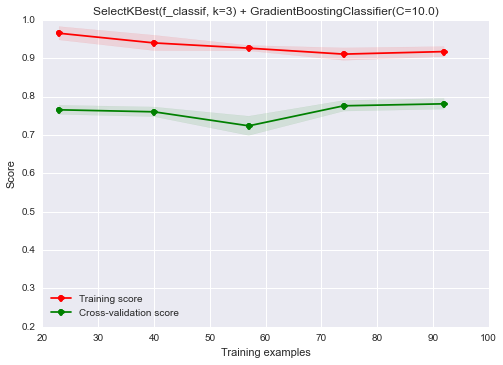

In [18]:
plot_learning_curve(Pipeline([("fs", SelectKBest(f_classif, k=3)), # select three features
                               ("GBC", GradientBoostingClassifier(random_state=seed, n_estimators=50))]),
                    "SelectKBest(f_classif, k=3) + GradientBoostingClassifier(C=10.0)",
                    X, Y, ylim=(0.2, 1.0),
                    train_sizes=np.linspace(.05, 0.2, 5))

#### LogisticRegression

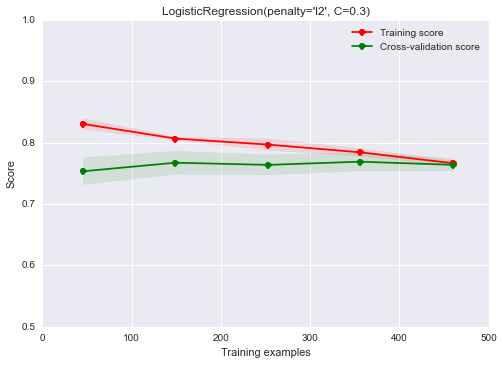

In [19]:
plot_learning_curve(LogisticRegression(penalty='l2', C=0.3),
                    "LogisticRegression(penalty='l2', C=0.3)",
                    X, Y, ylim=(0.5, 1.0), 
                    train_sizes=np.linspace(.1, 1.0, 5))

## Finalize Model

### Ensembles

In [20]:
# prepare the model
ensembles_model = GradientBoostingClassifier(random_state=seed, n_estimators=50)
ensembles_model.fit(X_train, Y_train)

GradientBoostingClassifier(init=None, learning_rate=0.1, loss='deviance',
              max_depth=3, max_features=None, max_leaf_nodes=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=50,
              random_state=7, subsample=1.0, verbose=0, warm_start=False)

In [21]:
# transform the validation dataset
predictions = ensembles_model.predict(X_validation)
print("log_loss", log_loss(Y_validation, predictions))
print("accuracy_score", accuracy_score(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

('log_loss', 6.8482332368333321)
('accuracy_score', 0.80172413793103448)
             precision    recall  f1-score   support

          0       0.82      0.95      0.88        88
          1       0.69      0.32      0.44        28

avg / total       0.79      0.80      0.77       116

[[84  4]
 [19  9]]


### SCV

In [35]:
svc_model = SVC(C=2.5, kernel="rbf", gamma=1.0, probability=True)
svc_model.fit(X_train, Y_train)

SVC(C=2.5, cache_size=200, class_weight=None, coef0=0.0, degree=3, gamma=1.0,
  kernel='rbf', max_iter=-1, probability=True, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [36]:
# transform the validation dataset
predictions = svc_model.predict(X_validation)
print("log_loss", log_loss(Y_validation, predictions))
print("accuracy_score", accuracy_score(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

('log_loss', 6.2527233059309042)
('accuracy_score', 0.81896551724137934)
             precision    recall  f1-score   support

          0       0.82      0.98      0.89        88
          1       0.82      0.32      0.46        28

avg / total       0.82      0.82      0.79       116

[[86  2]
 [19  9]]


### LogisticRegression

In [25]:
lg_model = LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50, multi_class='ovr',
          penalty='l2', random_state=1091, solver='liblinear', tol=0.0001,
          verbose=0)
lg_model.fit(X_train, Y_train)

LogisticRegression(C=0.001, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=50, multi_class='ovr',
          penalty='l2', random_state=1091, solver='liblinear', tol=0.0001,
          verbose=0)

In [26]:
# transform the validation dataset
predictions = lg_model.predict(X_validation)
print("log_loss", log_loss(Y_validation, predictions))
print("accuracy_score", accuracy_score(Y_validation, predictions))
print(classification_report(Y_validation, predictions))
print(confusion_matrix(Y_validation, predictions))

('log_loss', 7.4437087023292872)
('accuracy_score', 0.78448275862068961)
             precision    recall  f1-score   support

          0       0.78      0.99      0.87        88
          1       0.80      0.14      0.24        28

avg / total       0.79      0.78      0.72       116

[[87  1]
 [24  4]]


## Predict results

In [32]:
X_test, IDs = load_data(train=False, SEED=seed, scale=True,
              minmax=False,
              nointercept=True,
              engineering=False)

In [37]:
preds = svc_model.predict_proba(X_test)

In [38]:
preds[:10]

array([[ 0.53462889,  0.46537111],
       [ 0.78330106,  0.21669894],
       [ 0.7998007 ,  0.2001993 ],
       [ 0.81082373,  0.18917627],
       [ 0.57367165,  0.42632835],
       [ 0.3980689 ,  0.6019311 ],
       [ 0.80869632,  0.19130368],
       [ 0.80934668,  0.19065332],
       [ 0.79959307,  0.20040693],
       [ 0.839952  ,  0.160048  ]])

In [39]:
preds = [x[1] for x in preds]

In [40]:
preds[:10]

[0.4653711122608738,
 0.21669894405437176,
 0.20019929510422199,
 0.18917627231945627,
 0.42632835209030362,
 0.60193110494995905,
 0.19130367666319828,
 0.19065331956405976,
 0.20040693065026136,
 0.16004800386417406]

In [42]:
solution = pd.DataFrame({"": IDs, "Made Donation in March 2007": preds})
solution.to_csv("./results/04_machine_learning_apply_process_v01.csv", index = False)

This solution has score 0.4988 (508/2048 = top 24%) on Drivendata on Dec. 18, 2016, 7:14 p.m.